In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ceselima","key":"aa4d4e384b56cded97b076ef8170005a"}'}

In [ ]:
import numpy as np

# Daten und Visualisierung
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, root_mean_squared_error

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#Kaggle-API-Zugangsdaten

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 611MB/s]


In [ ]:
!unzip adult-income-dataset.zip
!ls

Archive:  adult-income-dataset.zip
  inflating: adult.csv               
adult.csv  adult-income-dataset.zip  sample_data


**Teil 1: **

- Datenbereinigung/Umwandlung
- Train/Test-Split: Features x und Zielvariable y aufgeteilt
- Modelltraining: Logistische Regression
- Vorhersage: Testdaten vorhergesagt
- Evaluation: Accuracy+Konfusionsmatrix

In [ ]:
df = pd.read_csv("adult.csv")

In [ ]:
#df = pd.read_csv("adult.csv") liest die Daten aus der Datei in ein DataFrame namens df ein.
#df.head() zeigt die ersten 5 Zeilen dieses DataFrames an.

df = pd.read_csv("adult.csv")
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
#Übersicht Namen der Kategorien
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [ ]:
#Überblick des Datensatzes
df.head()
df.info()
df['income'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,count
income,
<=50K,37155
>50K,11687


In [ ]:
#Keine fehlenden Werte (NaN)
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [ ]:
# 1. Alle Spaltennamen bereinigen (Leerzeichen entfernen)
df.columns = df.columns.str.strip()

# 2. Kategorische Spalten definieren
kategorische_spalten = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'gender', 'native-country', 'income'
]

# 3. Nur existierende Spalten auswählen (falls Tippfehler oder fehlende Spalten)
kategorische_spalten = [col for col in kategorische_spalten if col in df.columns]

# 4. Kategorische Spalten in numerische Dummy-Variablen umwandeln
# drop_first=True entfernt die erste Dummy-Spalte, um Multikollinearität zu vermeiden
df = pd.get_dummies(df, columns=kategorische_spalten, drop_first=True)

# 5. Kurzer Überblick
print(df.head())
print(df.info())


   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                 True                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  native-country_Puerto-Rico  \
0               True  ...    

An dieser Stelle sollte der Code bereinigt und umgewandelt worden sein. Jetzt kann man die Daten in Features und Labels aufteilen.

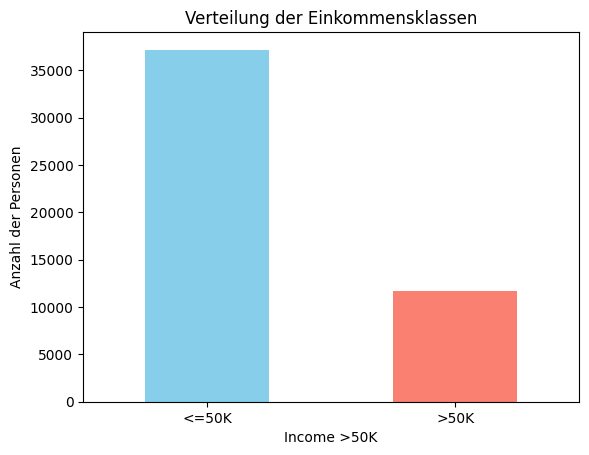

In [ ]:
# Features (alles außer Zielvariable)
X = df.drop(['income_>50K', 'age'], axis=1)


# Zielvariable
y = df['income_>50K']

# Aufteilen in Trainings- und Testset (80% Training, 20% Test)
X_train_scaled, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from matplotlib import pyplot as plt

#Übersicht der Verteilung der Einkommensklassen
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Verteilung der Einkommensklassen')
plt.xlabel('Income >50K')
plt.ylabel('Anzahl der Personen')
plt.xticks([0,1], ['<=50K', '>50K'], rotation=0)
plt.show()

Features (X): Alle Spalten, die wir nutzen, um Einkommen vorherzusagen, also z. B. age, education-num, hours-per-week und alle Dummy-Variablen.

Zielvariable (y): Die Spalte income_>50K (0 = <=50K, 1 = >50K).

Train-Test-Split: Wir teilen die Daten in zwei Teile:

Trainingsdaten (80%) → hier lernt das Modell

Testdaten (20%) → hier prüfen wir, wie gut das Modell auf neuen, unbekannten Daten ist.

Mit Train/Test-Split simulieren wir, dass unser Modell "neue Personen" vorhersagen muss, die es noch nie gesehen hat, um später die Accuracy unseres Modells testen zu können. Indem wir unsere Testdaten in 80/20 aufteilen, vermeiden wir Overfitting. Dadurch können wir mit den anderen Testdaten Vorhersageleistung messen.

-> Binäres Klassifikationsproblem

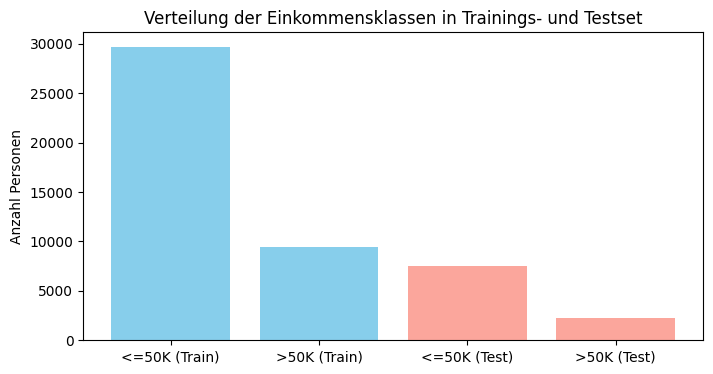

In [ ]:
#Visualisierung der Spaltung des Datensatzes in Testdaten und Trainingsdaten

plt.figure(figsize=(8,4))
plt.bar(['<=50K (Train)', '>50K (Train)'], y_train.value_counts().sort_index(), color='skyblue')
plt.bar(['<=50K (Test)', '>50K (Test)'], y_test.value_counts().sort_index(), color='salmon', alpha=0.7)
plt.title('Verteilung der Einkommensklassen in Trainings- und Testset')
plt.ylabel('Anzahl Personen')
plt.show()

Genauigkeit (Accuracy): 0.8560753403623708

Klassifikationsbericht:
               precision    recall  f1-score   support

       False       0.88      0.93      0.91      7479
        True       0.74      0.60      0.66      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



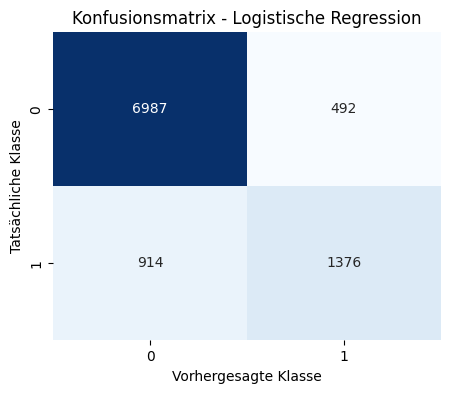

In [ ]:
# 📊 Logistische Regression: Einkommensvorhersage

# Modell initialisieren und trainieren
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train_scaled_data, y_train)
log_reg

# Vorhersagen auf Testdaten
y_pred = log_reg.predict(X_test_scaled_data)
y_prob = log_reg.predict_proba(X_test_scaled_data)[:, 1]

# Modellbewertung
print("Genauigkeit (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKlassifikationsbericht:\n", classification_report(y_test, y_pred))

# 📉 Konfusionsmatrix visualisieren
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Konfusionsmatrix - Logistische Regression')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()



LogisticRegression(...): erstellt ein binäres Klassifikationsmodell. Logistic Regression ist ein Modell für binäre Klassifikation.

Es lernt, anhand der Features (X_train) die Wahrscheinlichkeit zu schätzen, dass jemand >50K verdient.

max_iter=1000 sorgt dafür, dass das Modell genug „Versuche“ bekommt, um die optimalen Parameter zu finden.

Logistische Regression lernt, welche Features das Einkommen am stärksten beeinflussen.

.fit(...): trainiert es auf deinen skalierten Trainingsdaten.

.predict(...) & .predict_proba(...): liefert Klassenvorhersagen und Wahrscheinlichkeiten.

Visualisierungen:

Eine Konfusionsmatrix zeigt, wie viele Fälle richtig/falsch klassifiziert wurden.
Die Konfusionsmatrix zeigt, ob das Modell Personen richtig (True Positive/True Negative) oder falsch (False Positive/False Negative) klassifiziert. Zusammen mit der Accuracy sehen wir, wie zuverlässig das Modell zwischen <=50K und >50K unterscheidet.

True Negative (TN) oben links: Modell sagt <=50K und die Person verdient tatsächlich <=50K. → korrekt negative Vorhersage

False Positive (FP) oben rechts: Modell sagt >50K, aber die Person verdient <=50K. → falsch positiv, also „zu hohe Vorhersage“

False Negative (FN) unten links: Modell sagt <=50K, aber die Person verdient >50K. → falsch negativ, also „zu niedrige Vorhersage“

True Positive (TP) unten rechts: Modell sagt >50K und die Person verdient tatsächlich >50K. → korrekt positive Vorhersage

Beginn der Aufgabe 2:
- Diskrimminierungspotentiale identifizieren, indem bestimme Kategorien visualisiert werden


In [ ]:
#1.Subgruppen der Featrues prüfen.
# Features skalieren
scaler = StandardScaler()           # Mittelwert=0, Standardabweichung=1
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)

# Geschlecht
print(df['gender_Male'].value_counts())

# Alter in Gruppen unterteilen
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['<30', '30-50', '>50'])
print(df['age_group'].value_counts())

# Race
race_cols = [col for col in df.columns if col.startswith('race_')]
for col in race_cols:
    print(col, df[col].sum())

gender_Male
True     32650
False    16192
Name: count, dtype: int64
age_group
30-50    23241
<30      15793
>50       9808
Name: count, dtype: int64
race_Asian-Pac-Islander 1519
race_Black 4685
race_Other 406
race_White 41762


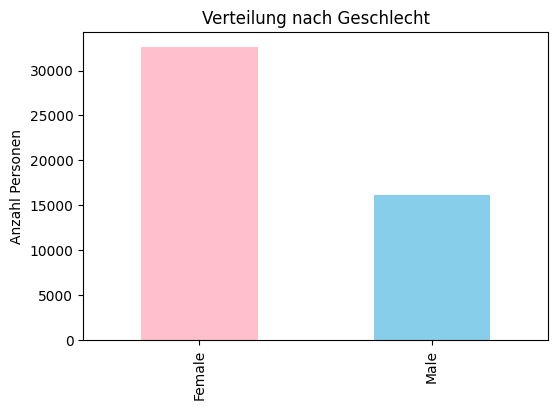

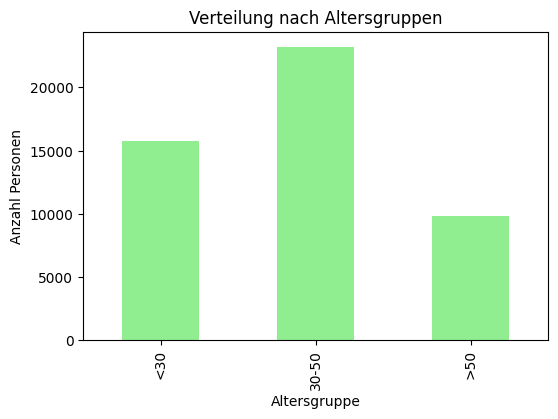

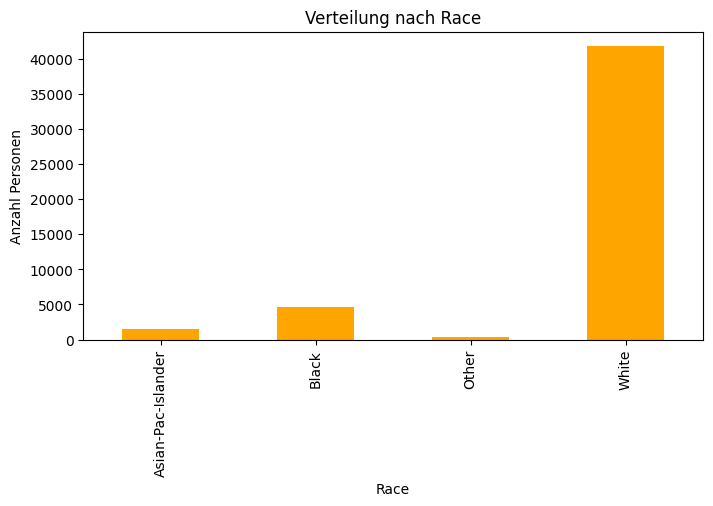

In [ ]:
#Visualisierung des originalen Datensatzes

# Anzahl Männer/Frauen
gender_counts = df['gender_Male'].value_counts()
gender_counts.index = ['Female', 'Male']  # Labels anpassen

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['pink','skyblue'])
plt.title('Verteilung nach Geschlecht')
plt.ylabel('Anzahl Personen')
plt.show()

#Visualisierung der Altersgruppen
age_counts = df['age_group'].value_counts().sort_index()

plt.figure(figsize=(6,4))
age_counts.plot(kind='bar', color='lightgreen')
plt.title('Verteilung nach Altersgruppen')
plt.ylabel('Anzahl Personen')
plt.xlabel('Altersgruppe')
plt.show()

#Visualisierung nach Race
race_counts = df[race_cols].sum()  # Summe jeder Race-Spalte
race_counts.index = [col.replace('race_','') for col in race_counts.index]

plt.figure(figsize=(8,4))
race_counts.plot(kind='bar', color='orange')
plt.title('Verteilung nach Race')
plt.ylabel('Anzahl Personen')
plt.xlabel('Race')
plt.show()

Auffällig: Es gibt etwas mehr als doppelt so viele Männer wie Frauen. Die größte Altersgruppe ist zwischen 30-50. Mehr als 80% der Teilnehmenden sind weiß.

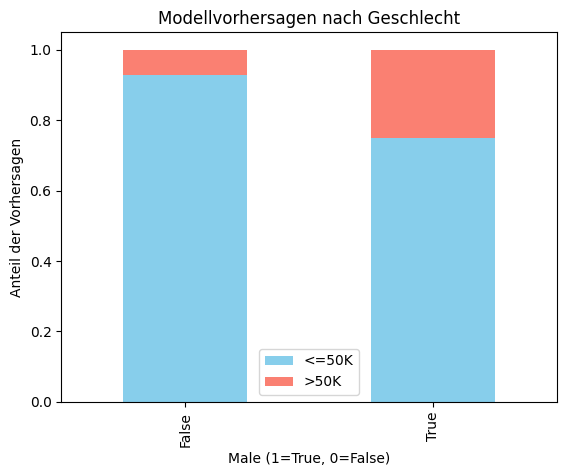

/tmp/ipython-input-1487072338.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = X_test_eval.groupby('age_group')['y_pred'].value_counts(normalize=True).unstack()


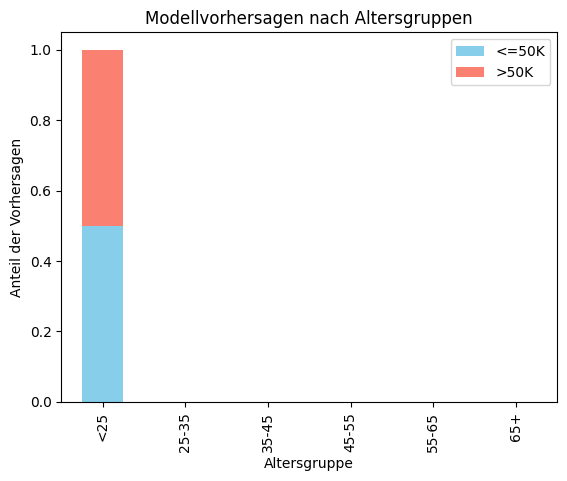

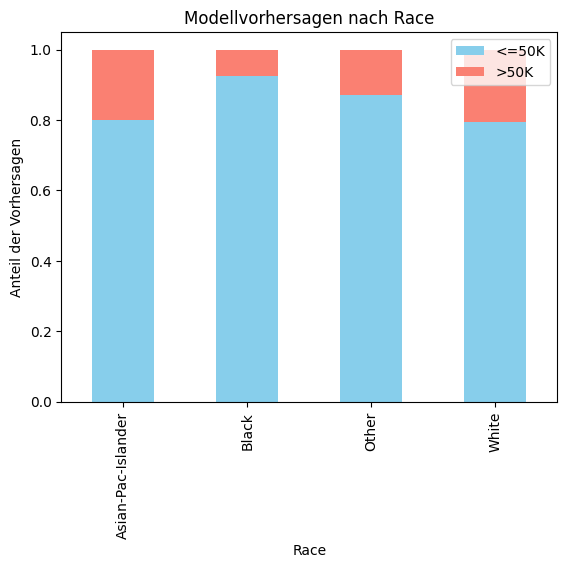

In [ ]:
# Gruppieren nach Gender
df_gender = X_test_eval.groupby('gender_Male')['y_pred'].value_counts(normalize=True).unstack()

# Visualisieren Gender
df_gender.plot(kind='bar', stacked=True, color=['skyblue','salmon'])
plt.title('Modellvorhersagen nach Geschlecht')
plt.xlabel('Male (1=True, 0=False)')
plt.ylabel('Anteil der Vorhersagen')
plt.legend(['<=50K','>50K'])
plt.show()

# 🧩 Sicherstellen, dass die Alters-Spalte gefunden wird
age_col = [col for col in X_test_eval.columns if 'age' in col.lower()]
if age_col:
    age_col = age_col[0]  # Nimm die erste Spalte, die 'age' enthält
else:
    raise KeyError("Keine Spalte mit 'age' gefunden — bitte prüfen, wie sie im DataFrame heißt.")

# Altersgruppen wiederherstellen (z. B. in 5er oder 10er Schritten)
X_test_eval['age_group'] = pd.cut(
    X_test_eval[age_col],
    bins=[0, 25, 35, 45, 55, 65, 100],
    labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+']
)

# Gruppieren nach Altersgruppe
df_age = X_test_eval.groupby('age_group')['y_pred'].value_counts(normalize=True).unstack()

# Visualisierung Age
df_age.plot(kind='bar', stacked=True, color=['skyblue','salmon'])
plt.title('Modellvorhersagen nach Altersgruppen')
plt.xlabel('Altersgruppe')
plt.ylabel('Anteil der Vorhersagen')
plt.legend(['<=50K','>50K'])
plt.show()

# Race wieder zusammensetzen
race_cols = [col for col in X_test_eval.columns if col.startswith('race_')]
if race_cols:
    X_test_eval['race'] = X_test_eval[race_cols].idxmax(axis=1).str.replace('race_', '')

    # Gruppieren nach Race
    df_race = X_test_eval.groupby('race')['y_pred'].value_counts(normalize=True).unstack()

    # Visualisierung Race
    df_race.plot(kind='bar', stacked=True, color=['skyblue','salmon'])
    plt.title('Modellvorhersagen nach Race')
    plt.xlabel('Race')
    plt.ylabel('Anteil der Vorhersagen')
    plt.legend(['<=50K','>50K'])
    plt.show()
else:
    print("Keine race_-Spalten gefunden.")





Hiermit wurden nun Diskrimminierungspotenziale identifiziert. Im kommenden Teil wird nun Oversampling angewendet.

Vor Oversampling: income_>50K
False    0.759501
True     0.240499
Name: proportion, dtype: float64

Nach Oversampling: income_>50K
False    0.5
True     0.5
Name: proportion, dtype: float64

Vergleich Standardmodell vs. Bias-mitigiertes Modell
------------------------------------------------------
Standardmodell Accuracy: 0.8560753403623708
Mit Oversampling Accuracy: 0.8117514586958747

Klassifikationsbericht (Oversampled Modell):
              precision    recall  f1-score   support

       False       0.94      0.81      0.87      7479
        True       0.57      0.82      0.67      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769



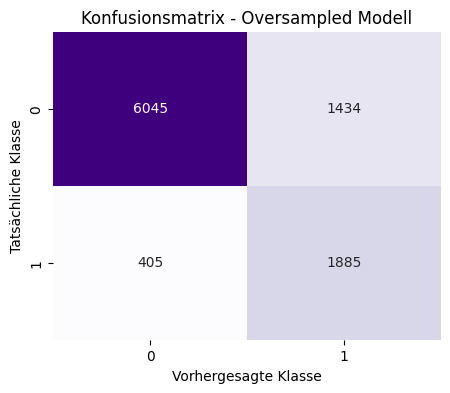

In [ ]:
from imblearn.over_sampling import SMOTE

# Oversampling mit SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_data, y_train)

print("Vor Oversampling:", y_train.value_counts(normalize=True))
print("\nNach Oversampling:", y_train_resampled.value_counts(normalize=True))

# Neues Modell trainieren (nach Oversampling)
log_reg_balanced = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg_balanced.fit(X_train_resampled, y_train_resampled)

# Neue Vorhersagen treffen
y_pred_balanced = log_reg_balanced.predict(X_test_scaled_data)
y_prob_balanced = log_reg_balanced.predict_proba(X_test_scaled_data)[:, 1]

# Vergleich der Genauigkeit
print("\nVergleich Standardmodell vs. Bias-mitigiertes Modell")
print("------------------------------------------------------")
print("Standardmodell Accuracy:", accuracy_score(y_test, y_pred))
print("Mit Oversampling Accuracy:", accuracy_score(y_test, y_pred_balanced))

# Klassifikationsbericht
print("\nKlassifikationsbericht (Oversampled Modell):")
print(classification_report(y_test, y_pred_balanced))

# Konfusionsmatrix visualisieren
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_balanced), annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Konfusionsmatrix - Oversampled Modell')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

Output:
- Accuracy gesunken (von ca. 0.86 auf 0.81), aber Bias wurde reduziert
- Problem vorher: Die Klasse „>50K Einkommen“ war stark unterrepräsentiert (nur 24 %).
Das führt dazu, dass ein Modell hauptsächlich die Mehrheit („<=50K“) korrekt vorhersagt — was zwar hohe Accuracy, aber unausgewogene Fairness ergibt.
- Im Datensatz war die Zielvariable stark unausgeglichen: <=50K Klasse hat einen 76&-igen Anteil, >50K nur 24%. Das Modell „lernt“:

„Die meisten Leute verdienen eh weniger als 50K — also sage ich lieber immer <=50K.“

Damit werden Menschen mit tatsächlichem Einkommen > 50K systematisch benachteiligt:
das Modell erkennt sie kaum.
- Beim Oversampling erzeugst du künstlich mehr Beispiele der Minderheitenklasse (> 50K), bis beide Klassen gleich häufig sind mit 50/50.
- Das heißt nicht, dass du jetzt denkst, die Welt wäre 50 / 50 verteilt.
Sondern:
Du gibst dem Modell im Training gleich viel Gelegenheit, beide Klassen zu „verstehen“.
- Das Modell „sieht“ 3-mal mehr Personen mit <= 50K.

Es lernt also bessere Muster für die Mehrheit.

Es „ignoriert“ die Minderheit, weil sie zu selten vorkommt.

Nach Oversampling:

Das Modell sieht gleich viele Beispiele für beide Klassen.

Es kann also gleich gut lernen, wie ein Mensch mit > 50K aussieht (z. B. nach Beruf, Bildung, Alter, etc.).

Damit steigt die Wahrscheinlichkeit, dass es auch bei Minderheiten (z. B. Frauen, People of Color, jüngere Personen) „hohes Einkommen“ erkennt.
- Nach Oversampling:

Recall (>50K) = 0.82 → das Modell erkennt 82 % der tatsächlichen >50K-Fälle korrekt.

Vorher war der Recall viel niedriger (~0.5 oder weniger).

Das zeigt:

Das Modell hat gelernt, auch in Gruppen mit geringerer Repräsentation (> 50K) bessere Entscheidungen zu treffen.

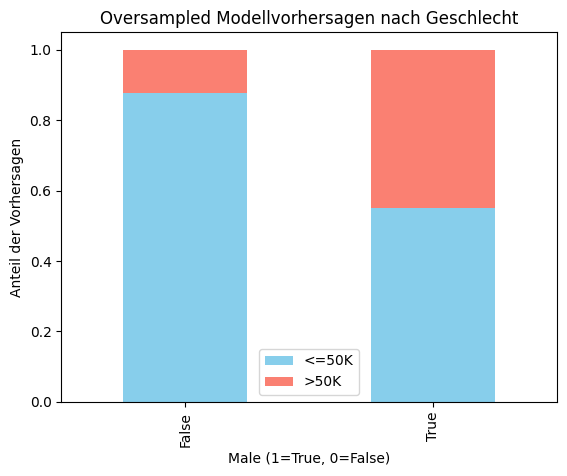

/tmp/ipython-input-2364376296.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = X_test_eval_bal.groupby('age_group')['y_pred'].value_counts(normalize=True).unstack()


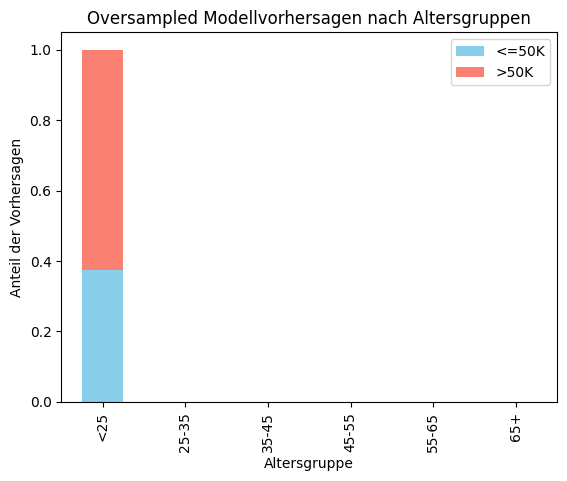

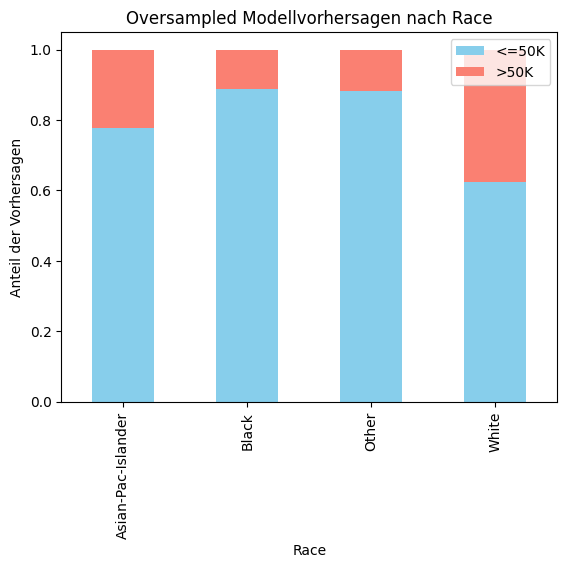

In [ ]:
# Testdaten in DataFrame umwandeln (falls noch nicht)
X_test_eval_bal = pd.DataFrame(X_test_scaled_data, columns=X_train_scaled_data.columns)
X_test_eval_bal['y_pred'] = y_pred_balanced

# 🔹 Gender
df_gender = X_test_eval_bal.groupby('gender_Male')['y_pred'].value_counts(normalize=True).unstack()
df_gender.plot(kind='bar', stacked=True, color=['skyblue','salmon'])
plt.title('Oversampled Modellvorhersagen nach Geschlecht')
plt.xlabel('Male (1=True, 0=False)')
plt.ylabel('Anteil der Vorhersagen')
plt.legend(['<=50K','>50K'])
plt.show()

# 🔹 Age
age_col = [col for col in X_test_eval_bal.columns if 'age' in col.lower()][0]
X_test_eval_bal['age_group'] = pd.cut(
    X_test_eval_bal[age_col],
    bins=[0, 25, 35, 45, 55, 65, 100],
    labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+']
)
df_age = X_test_eval_bal.groupby('age_group')['y_pred'].value_counts(normalize=True).unstack()
df_age.plot(kind='bar', stacked=True, color=['skyblue','salmon'])
plt.title('Oversampled Modellvorhersagen nach Altersgruppen')
plt.xlabel('Altersgruppe')
plt.ylabel('Anteil der Vorhersagen')
plt.legend(['<=50K','>50K'])
plt.show()

# 🔹 Race
race_cols = [col for col in X_test_eval_bal.columns if col.startswith('race_')]
if race_cols:
    X_test_eval_bal['race'] = X_test_eval_bal[race_cols].idxmax(axis=1).str.replace('race_', '')
    df_race = X_test_eval_bal.groupby('race')['y_pred'].value_counts(normalize=True).unstack()
    df_race.plot(kind='bar', stacked=True, color=['skyblue','salmon'])
    plt.title('Oversampled Modellvorhersagen nach Race')
    plt.xlabel('Race')
    plt.ylabel('Anteil der Vorhersagen')
    plt.legend(['<=50K','>50K'])
    plt.show()


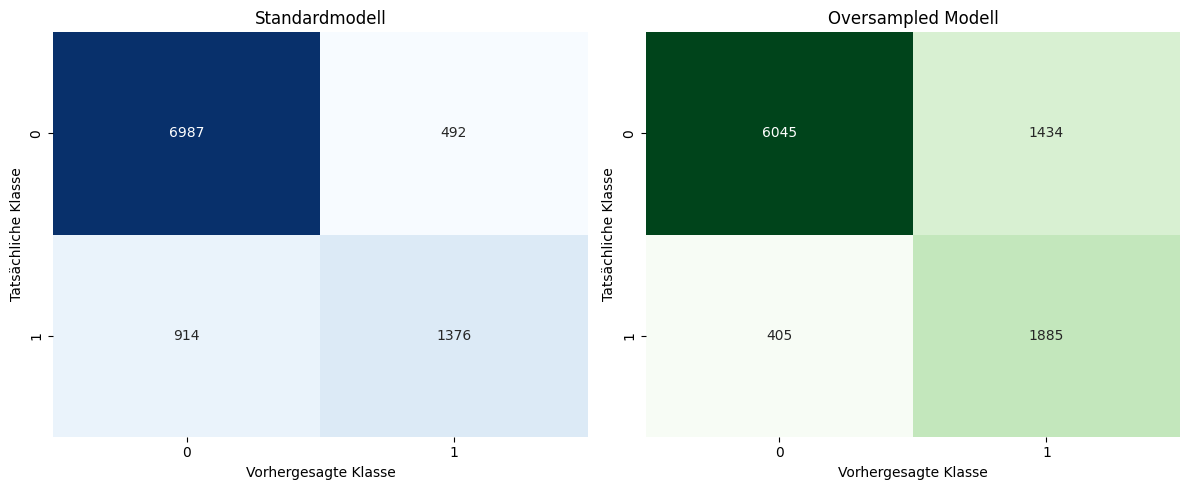

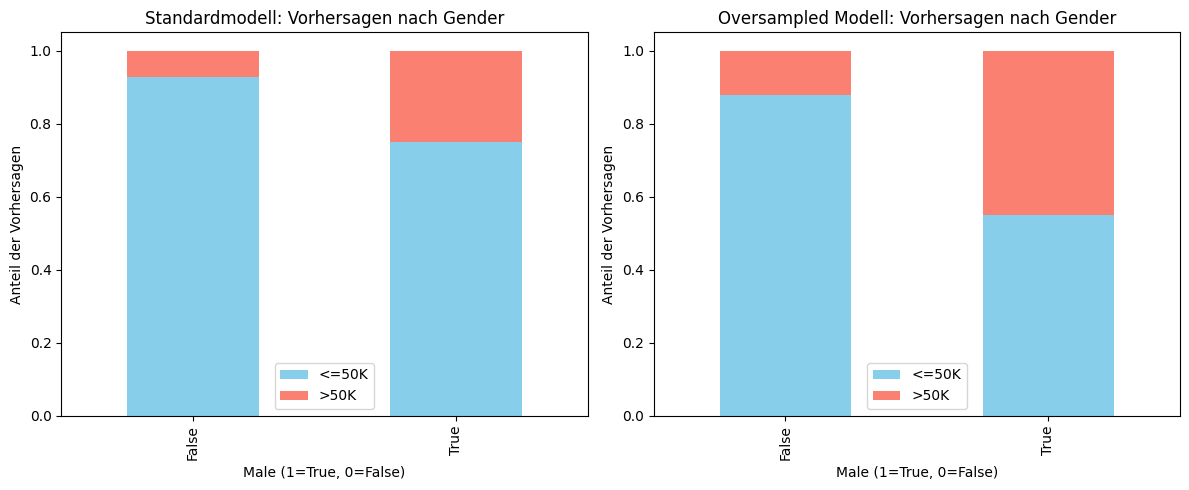

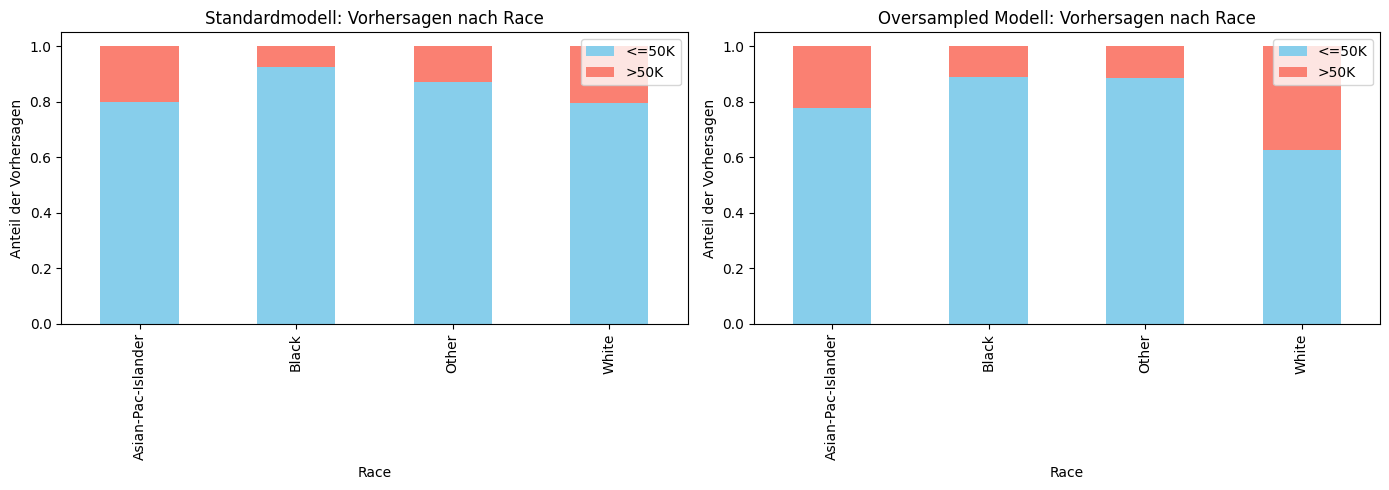

/tmp/ipython-input-535219166.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_standard = X_test_eval.groupby('age_group')['y_pred_standard'].value_counts(normalize=True).unstack()
/tmp/ipython-input-535219166.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_balanced = X_test_eval.groupby('age_group')['y_pred_balanced'].value_counts(normalize=True).unstack()


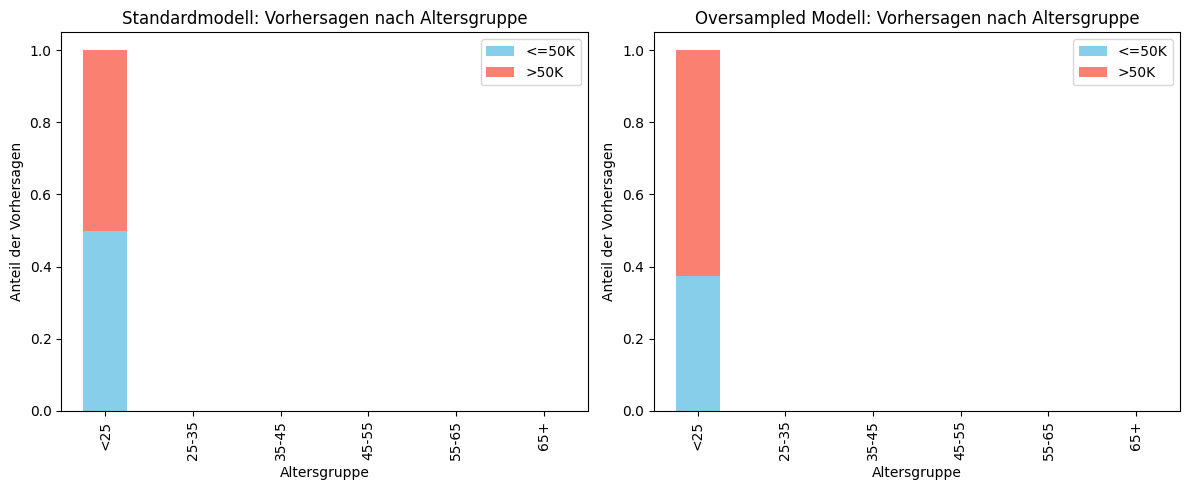

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# -------------------------
# 1️⃣ Konfusionsmatrix nebeneinander
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Standardmodell
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Standardmodell')
axes[0].set_xlabel('Vorhergesagte Klasse')
axes[0].set_ylabel('Tatsächliche Klasse')

# Oversampled Modell
sns.heatmap(confusion_matrix(y_test, y_pred_balanced), annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title('Oversampled Modell')
axes[1].set_xlabel('Vorhergesagte Klasse')
axes[1].set_ylabel('Tatsächliche Klasse')

plt.tight_layout()
plt.show()

# -------------------------
# 2️⃣ Balkendiagramm nach Subgruppen (Gender & Altersgruppe)
# -------------------------

# Testdaten DataFrame erstellen
X_test_eval = pd.DataFrame(X_test_scaled_data, columns=X_train_scaled_data.columns)
X_test_eval['y_pred_standard'] = y_pred
X_test_eval['y_pred_balanced'] = y_pred_balanced

# 🔹 Gender
df_gender_standard = X_test_eval.groupby('gender_Male')['y_pred_standard'].value_counts(normalize=True).unstack()
df_gender_balanced = X_test_eval.groupby('gender_Male')['y_pred_balanced'].value_counts(normalize=True).unstack()

fig, axes = plt.subplots(1, 2, figsize=(12,5))
df_gender_standard.plot(kind='bar', stacked=True, color=['skyblue','salmon'], ax=axes[0])
axes[0].set_title('Standardmodell: Vorhersagen nach Gender')
axes[0].set_xlabel('Male (1=True, 0=False)')
axes[0].set_ylabel('Anteil der Vorhersagen')
axes[0].legend(['<=50K','>50K'])

df_gender_balanced.plot(kind='bar', stacked=True, color=['skyblue','salmon'], ax=axes[1])
axes[1].set_title('Oversampled Modell: Vorhersagen nach Gender')
axes[1].set_xlabel('Male (1=True, 0=False)')
axes[1].set_ylabel('Anteil der Vorhersagen')
axes[1].legend(['<=50K','>50K'])

plt.tight_layout()
plt.show()

# 🔹 Race wieder zusammensetzen
race_cols = [col for col in X_test_eval.columns if col.startswith('race_')]
if race_cols:
    # Original Race wiederherstellen
    X_test_eval['race'] = X_test_eval[race_cols].idxmax(axis=1).str.replace('race_', '')

    # Gruppieren nach Race
    df_race_standard = X_test_eval.groupby('race')['y_pred_standard'].value_counts(normalize=True).unstack()
    df_race_balanced = X_test_eval.groupby('race')['y_pred_balanced'].value_counts(normalize=True).unstack()

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    df_race_standard.plot(kind='bar', stacked=True, color=['skyblue','salmon'], ax=axes[0])
    axes[0].set_title('Standardmodell: Vorhersagen nach Race')
    axes[0].set_xlabel('Race')
    axes[0].set_ylabel('Anteil der Vorhersagen')
    axes[0].legend(['<=50K','>50K'])

    df_race_balanced.plot(kind='bar', stacked=True, color=['skyblue','salmon'], ax=axes[1])
    axes[1].set_title('Oversampled Modell: Vorhersagen nach Race')
    axes[1].set_xlabel('Race')
    axes[1].set_ylabel('Anteil der Vorhersagen')
    axes[1].legend(['<=50K','>50K'])

    plt.tight_layout()
    plt.show()
else:
    print("Keine Race-Spalten gefunden.")


# 🔹 Altersgruppen
age_col = [col for col in X_test_eval.columns if 'age' in col.lower()][0]
X_test_eval['age_group'] = pd.cut(
    X_test_eval[age_col],
    bins=[0, 25, 35, 45, 55, 65, 100],
    labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+']
)

df_age_standard = X_test_eval.groupby('age_group')['y_pred_standard'].value_counts(normalize=True).unstack()
df_age_balanced = X_test_eval.groupby('age_group')['y_pred_balanced'].value_counts(normalize=True).unstack()

fig, axes = plt.subplots(1, 2, figsize=(12,5))
df_age_standard.plot(kind='bar', stacked=True, color=['skyblue','salmon'], ax=axes[0])
axes[0].set_title('Standardmodell: Vorhersagen nach Altersgruppe')
axes[0].set_xlabel('Altersgruppe')
axes[0].set_ylabel('Anteil der Vorhersagen')
axes[0].legend(['<=50K','>50K'])

df_age_balanced.plot(kind='bar', stacked=True, color=['skyblue','salmon'], ax=axes[1])
axes[1].set_title('Oversampled Modell: Vorhersagen nach Altersgruppe')
axes[1].set_xlabel('Altersgruppe')
axes[1].set_ylabel('Anteil der Vorhersagen')
axes[1].legend(['<=50K','>50K'])

plt.tight_layout()
plt.show()


Reflexion:
Was ist aufgefallen:

Das Standardmodell hat die Minderheitsklasse >50K deutlich schlechter erkannt als die Mehrheitsklasse <=50K. Dies zeigt sich insbesondere am niedrigen Recall der >50K-Klasse.

Durch das Oversampling mit SMOTE wurde die Minderheitsklasse besser erfasst. Der Recall für >50K ist deutlich gestiegen, was zeigt, dass der Bias gegenüber der Minderheitsklasse teilweise gemindert wurde.

Die Konfusionsmatrix und die gestapelten Balkendiagramme nach Gender, Altersgruppe und Race verdeutlichen, dass das Modell nach SMOTE gleichmäßiger über Subgruppen Vorhersagen trifft.

Was fehlt:

Die Oversampling-Methode erzeugt synthetische Daten nur innerhalb der Minderheitsklasse. Die Verteilung der Features im Testset bleibt unverändert, sodass bestimmte Bias-Potenziale, z. B. bei Race oder Gender, weiterhin bestehen können.

Andere Bias-Quellen, wie nicht-lineare Zusammenhänge zwischen Features oder unvollständige Daten, wurden hier nicht berücksichtigt.

Es wurde kein Cost-Sensitive Learning oder Fairness-Constraint ausprobiert, die zusätzliche Bias-Reduktion bewirken könnten.

Was man besser machen könnte:

Kombination mehrerer Bias-Minderungsstrategien, z. B. SMOTE + Cost-Sensitive Learning oder Stratified Sampling, um eine robustere Klassifikation zu erreichen.

Evaluation mit Fairness-Metriken wie Demographic Parity oder Equalized Odds, um Subgruppen-spezifische Bias-Effekte noch genauer zu messen.

Betrachtung weiterer Features und Feature-Engineering, z. B. Interaktionen zwischen Alter, Beruf und Bildungsstand, um die Vorhersagekraft für die Minderheitsklasse zu verbessern.

Testen anderer Modelle (z. B. Random Forest, XGBoost), da manche Modelle weniger anfällig für Bias in unausgeglichenen Datensätzen sind.